# Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd

from fitparse import FitFile
import gpxpy
import gpxpy.gpx

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gmplot

## Load Data

In [42]:
DATE = "2023_04_14"
DATA_FOLDER = os.path.join("../data/android_app/", DATE)
REC = 82

# Acceleration data
acc_data = pd.read_csv(os.path.join(DATA_FOLDER, "DATA" + str(REC) + ".txt"), sep=";", header=1, names=["ay", "ax", "az"])

# acc_data = pd.read_csv(os.path.join(DATA_FOLDER, "DATA" + str(REC) + ".txt"), sep=";", header=1, names=["t", "ax", "ay", "az", "loc"])

## Acceleration Data

In [25]:
acc_data

,ay,ax,az
0,0.421380,0.373495,9.940725
1,0.411803,0.354342,9.902418
2,0.430956,0.325611,9.816227
3,0.392649,0.363919,9.844957
4,0.363919,0.354342,9.873688
5,0.373495,0.402226,9.892841
6,0.402226,0.354342,9.844957
7,0.430956,0.430956,9.758766
8,0.421380,0.306458,10.046070
9,0.363919,0.325611,10.065224


In [26]:
acc_data.describe()

,ay,ax,az
count,29.000000,29.000000,29.000000
mean,0.412133,0.374156,9.892181
std,0.032323,0.034045,0.074134
min,0.363919,0.306458,9.758766
25%,0.383072,0.354342,9.844957
50%,0.411803,0.373495,9.873688
75%,0.430956,0.392649,9.921572
max,0.488417,0.430956,10.065224


In [68]:
# acc_data.hist(column="ax")

In [69]:
acc_data.isna().sum()

ay    0
ax    0
az    0
dtype: int64

Text(0.5, 1.0, 'Acceleration Z')

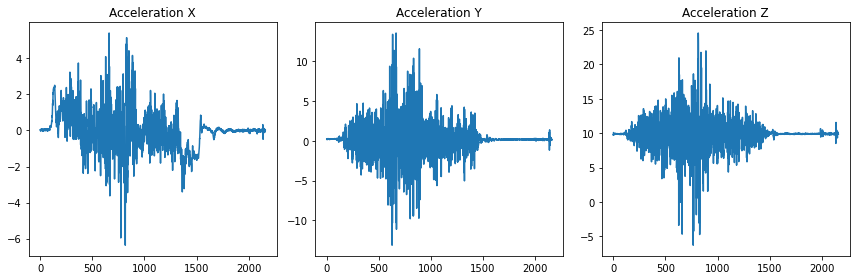

In [70]:
nb_measure = acc_data.shape[0]

fig, axs = plt.subplots(1,3)
fig.set_tight_layout(True)
fig.set_size_inches(12, 4)
axs[0].plot(range(nb_measure), acc_data["ax"])
axs[0].set_title("Acceleration X")
axs[1].plot(range(nb_measure), acc_data["ay"])
axs[1].set_title("Acceleration Y")
axs[2].plot(range(nb_measure), acc_data["az"])
axs[2].set_title("Acceleration Z")

In [30]:
def single_graph(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

def triple_graph(df):
    col_num = 1
    fig = make_subplots(rows=1, cols=3)
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col), row=1, col=col_num)
      col_num += 1
    fig.update_layout(height=1080/2, width=1920/2, title_text="Test")
    return fig

In [43]:
# fig = single_graph(acc_data[["ax", "ay", "az", "norm"]])
fig = single_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_1.html", full_html=False, include_plotlyjs="cdn")
fig.show()

In [39]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()

![](https://fr.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png)

## GPS Data

In [74]:
gps_data

NameError: name 'gps_data' is not defined

In [ ]:
units # Check if data has been converted when loading

{'alt': '?', 'lat': 'deg', 'long': 'deg'}

In [ ]:
gps_data.describe()

,lat,long
count,127.000000,127.000000
mean,48.403793,7.446247
std,0.003757,0.003521
min,48.397830,7.438549
25%,48.400252,7.444659
50%,48.404109,7.447500
75%,48.407728,7.448993
max,48.408625,7.450468


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>]],
      dtype=object)

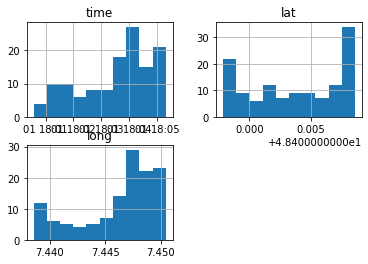

In [ ]:
gps_data.hist()

In [ ]:
gps_data.isna().sum()

time      0
lat       0
long      0
alt     127
dtype: int64

In [ ]:
min_lat, max_lat = min(gps_data["lat"]), max(gps_data["lat"])
min_lon, max_lon = min(gps_data["long"]), max(gps_data["long"])
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2,
                                min_lon + (max_lon - min_lon) / 2,
                                12)
mymap.plot(gps_data["lat"], gps_data["long"], "red", edge_width=2)
mymap.draw("data_analysis_gps.html")

In [ ]:
import webbrowser
webbrowser.open("data_analysis_gps.html")

True

## Tests

![](https://fr.mathworks.com/help/supportpkg/android/ref/simulinkandroidsupportpackage_galaxys4_accelerometer.png)

In [75]:
DATA_FOLDER = "../data/android_app/test"
REC = "X"

# Acceleration data
acc_data = pd.read_csv(os.path.join(DATA_FOLDER, "DATA" + str(REC) + ".txt"), sep=";", header=1, names=["t", "ax", "ay", "az", "loc"])

In [76]:
fig = triple_graph(acc_data[["ax", "ay", "az"]])
fig.write_html("data_analysis_acc_2.html", full_html=False, include_plotlyjs="cdn")
fig.show()

## Remove Invalid Files

In [41]:
files = [file for file in os.listdir(DATA_FOLDER) if os.path.isfile(os.path.join(DATA_FOLDER, file)) and file.endswith(".txt")]
nb_min_lines = None
for file in files:
    with open(os.path.join(DATA_FOLDER, file), 'r') as f:
        nb_lines = len(f.readlines())
        if nb_min_lines is None:
            nb_min_lines = nb_lines
        if nb_lines < nb_min_lines or nb_min_lines is None:
            nb_min_lines = nb_lines
        if nb_lines < 1500:
            print(file, nb_lines)
print("nb_min_lines =", nb_min_lines)

DATA3.txt 1450
DATA14.txt 1437
DATA18.txt 1478
DATA7.txt 1469
DATA5.txt 1456
DATA20.txt 1289
DATA16.txt 1293
DATA10.txt 1463
DATA9.txt 1459
DATA22.txt 1396
DATA24.txt 1428
nb_min_lines = 1289
